# Lab 0: Introduction to numpy & gym
In this lab session, we will go over the basic usage of the linear algebra library [numpy](https://numpy.org/), as well as the Reinforcement Learning framework abstraction library [gym](https://gym.openai.com/).

## 1. numpy
### The numpy array
Numpy centers over the multidimensional array object, `array`. It is simply a table of elements (generally scalars), much like a list. In the vast majority of cases, numpy arrays will be containing elements of the same type; this will allow for fast computations.

In [1]:
import numpy as np

In [2]:
a = np.array([[1., 0., 0.],
              [0., 1., 2.]])
a

array([[1., 0., 0.],
       [0., 1., 2.]])

The array can be reffered to as *multidimensional* if there are nested lists; use `array.ndim` to extract the number of dimensions:

In [3]:
a.ndim

2

The **shape** of an array provides the number of elements along each dimension, or **axis**, of the array. In our case, our array is a list of two elements, so the first axis is of dimension 2. Since these elements are arrays of 3 elements themselves, the second axis is of dimension 3.

In [4]:
a.shape

(2, 3)

Note that shapes are expressed as tuples (n,m,k,...).

There are several other properties of the array you might be interested about:

In [5]:
print(f"Array of size {a.size} (total elements); of type {a.dtype}; size in bytes: {a.itemsize}")

Array of size 6 (total elements); of type float64; size in bytes: 8


### Creating arrays

The main `np.array` function comes with several options, that you can find exhaustively [here](https://numpy.org/doc/stable/reference/generated/numpy.array.html). 

Mainly, it takes in a list (or array), and can take in the desired [data type](https://numpy.org/doc/stable/user/basics.types.html):

In [6]:
l = [[1., 2., 3.],
     [4., 5., 6.],
     [7., 8., 9.]]

np.array(l, dtype=np.int)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

The `zeros` and `ones` functions are very convenient to quickly create arrays full of zeros or ones. We need to pass in the desired shape; and can additionally request a data type again:

In [7]:
np.zeros((5,10), dtype=np.float)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
np.ones((5,10), dtype=np.int)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

For any specific value, use `np.full`:

In [9]:
np.full((5,10), 5)

array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]])

We can also match another array's shape directly using `zeros_like`, `ones_like` or `full_like`:

In [10]:
np.ones_like(a)

array([[1., 1., 1.],
       [1., 1., 1.]])

If you want to create an array that you will fill in later, you can use `np.empty`. This will simply allocate data in RAM, without touching its value (set by past operations) - so be careful when using it!

In [11]:
np.empty((4,3))

array([[2.08890797e-316, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

We can generate sequences of numbers using `np.arange`:

In [12]:
np.arange(start=0, stop=20, step=2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

We can control the shape after creation with `reshape`:

In [13]:
np.arange(start=0, stop=20, step=2).reshape((2,5))

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

#### Random array generation
The `np.random` module allows you to generate random arrays sampled from [virtually all relevant distributions](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html):

In [14]:
np.random.uniform(low=0, high=1, size=10) # Sampling 10 elements from U[0,1] # same as np.random.rand()

array([0.10482332, 0.02537995, 0.03829762, 0.17847147, 0.56418836,
       0.04066057, 0.80686107, 0.60028069, 0.3538699 , 0.05961006])

In [15]:
np.random.normal(loc=0, scale=1, size=10) # Sampling 10 elements from N[0,1]

array([ 2.07787108, -1.66111886,  0.72131804,  0.80746756,  0.03424886,
        0.67956695, -0.06828745, -0.36643575, -0.33827294, -1.65872126])

In [16]:
np.random.randint(low=0, high=100, size=10) # 10 random integers in [0,10[

array([82, 52, 69, 54, 44, 25, 39, 61, 52, 68])

In [17]:
np.random.permutation([1, 1.5, 0.3, 6, 9])

array([0.3, 1. , 1.5, 9. , 6. ])

## Array operations
The real benefit of using numpy is in its fast implementation of array-wide operations. We can add and multiply arrays together efficiently with the basic operations:

In [18]:
a = np.arange(0,3,   dtype=np.int)
b = np.array([0,2,5],dtype=np.int)

print(a,b)

[0 1 2] [0 2 5]


In [19]:
a+b

array([0, 3, 7])

In [20]:
a*b

array([ 0,  2, 10])

In [21]:
a*2 + 5

array([5, 7, 9])

In [22]:
a**b

array([ 1,  1, 32])

We can also extract boolean arrays by applying comparisons:

In [23]:
a > 1

array([False, False,  True])

In [24]:
b > a

array([False,  True,  True])

All of the generic mathematical functions are available in numpy, and efficiently applied array-wide:

In [25]:
np.cos(a)

array([ 1.        ,  0.54030231, -0.41614684])

In [26]:
np.exp(b)

array([  1.       ,   7.3890561, 148.4131591])

You might have noted that arrays aren't really vectors, as multiplication is element-wise. If we want to apply the dot product (with a sanity check below):

In [27]:
np.dot(a,b)

12

In [28]:
sum([ea*eb for ea,eb in zip(a,b)])

12

## Indexing, slicing
The other main benefit of numpy is the efficient and quite intuitive array **indexing** - i.e., access specific coordinates in the array:

In [65]:
a = np.arange(10)*2
a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [66]:
a[1]

2

In [67]:
a[-1] # climbing down from the top

18

We can use boolean arrays to access True elements in a numpy array through indexing:

In [68]:
b = a>4
b

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True])

In [69]:
a[b]

array([ 6,  8, 10, 12, 14, 16, 18])

We can also use arrays for indexing

In [70]:
index_array = [3,6,9]
a[index_array]

array([ 6, 12, 18])

Be careful when indexing multidimensional arrays! Numpy expects a tuple of arrays, (a,b,c,..) with a the indexes along the first dimension, b along the second, etc. So a,b and c can be arrays, but the accessing index i in the array, in array\[i\], needs to be a tuple!

In [82]:
a = np.arange(25).reshape(5,5)
index = [3,4] # if I wanted to grab the cell [3,4]...
correct_index = (3,4) # 
print(f"Naive grabbing of the 3,4 cell: \n{a[index]}") # be careful! this grabs the rows of these indexes 
print(f"Correct grabbing of the 3,4 cell: \n{a[correct_index]}") # this is the correct way

correct_indexes = ([0, 3], [0,4]) # if we want to grab [0,0] and [3,4] 
print(f"Correct grabbing of the [0,0] and [3,4] cells: \n{a[correct_indexes]}") # this is the correct way

Naive grabbing of the 3,4 cell: 
[[15 16 17 18 19]
 [20 21 22 23 24]]
Correct grabbing of the 3,4 cell: 
19
Correct grabbing of the [0,0] and [3,4] cells: 
[ 0 19]


Array **slicing** allows you to perform cuts in the array:

In [35]:
a[6:]

array([12, 14, 16, 18])

In [36]:
a[:-3]

array([ 0,  2,  4,  6,  8, 10, 12])

In [37]:
a[1:5]

array([2, 4, 6, 8])

Slicing is even more relevant for multidimensional arrays:

In [38]:
a = np.arange(10).reshape(2,5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [39]:
a[:, 3] # for all (:) of the first axis, access the second axis, position 3

array([3, 8])

In [40]:
a[0,:]

array([0, 1, 2, 3, 4])

**IMPORTANT** -- slicing or indexing is called a *view* of your array. It is *still* your array!

In [41]:
b = a[:,3]
b

array([3, 8])

In [42]:
b *= -1
b

array([-3, -8])

In [43]:
a

array([[ 0,  1,  2, -3,  4],
       [ 5,  6,  7, -8,  9]])

Changing with \*= or += accesses the memory of the variable itself, while using `b = np.empty(1)` wouldn't have changed `a` as the variable `b` would have been completely reassigned.

While this *view* thing can be dangerous, it can also be very convenient:

In [44]:
a[:,3] = [-1, -1] # supports list or array affectation
a

array([[ 0,  1,  2, -1,  4],
       [ 5,  6,  7, -1,  9]])

Be careful matching dimensions!

In [45]:
a.shape

(2, 5)

In [46]:
a[1,:] = [-1,-2,-3,-4] # error: trying to put 4 values in a 5-valued array

ValueError: cannot copy sequence with size 4 to array axis with dimension 5

However, constants work automatically ("broadcasting"):

In [47]:
a[1,:] = -1
a

array([[ 0,  1,  2, -1,  4],
       [-1, -1, -1, -1, -1]])

## Heavy lifting
Let's visualize some of the operations we can do

In [48]:
import matplotlib
import matplotlib.pyplot as plt

Suppose we have an RGB image of size 160x90:

(90, 160, 3)

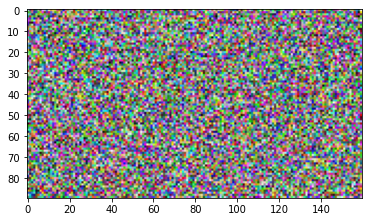

In [49]:
shape = (90, 160, 3) # 900 rows, 1600 columns; each pixel value is a 3D array [R,G,B]
rgb_image = np.random.randint(low=0, high=256, size=shape) # pixel values

plt.imshow(rgb_image)
rgb_image.shape

Let's check whether our random generator is good - we want our average pixel value to be around 255/2:

In [50]:
rgb_image.mean()

127.84990740740741

Let's add a red rectangle in the middle of our image:

(90, 160, 3)

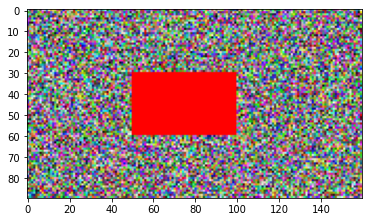

In [51]:
rgb_image[30:60, 50:100, :] = np.array([255,0,0])

plt.imshow(rgb_image)
rgb_image.shape

Let's say we wanted to turn this into a greyscale version. We need to decide how we want to lose our information (3D to 1D); the most natural way to do this in this case is through a simple mean. So we need to perform a mean over the RGB axis, and then divide by 256:

(90, 160)

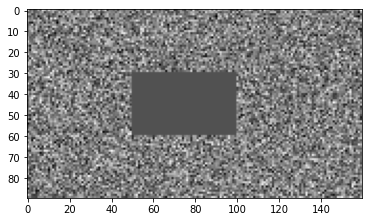

In [52]:
grey_image = rgb_image.mean(-1)/255 # .mean(-1) is equivalent to .mean(2), either meaning "last" or "2nd (starting 0)" axis

plt.imshow(grey_image, cmap='gray')
grey_image.shape

In [53]:
grey_image.mean()

0.4841894517066086

Let's say we wanted to make this completely black & white; there would be several approaches. The most straightforward should be to round up the values using `np.round`:

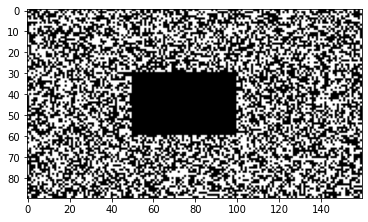

In [54]:
plt.imshow(np.round(grey_image), cmap='gray') # QR code generation?

If we wanted more control, e.g. only setting the values `>0.25` to white (1) without changing the rest:

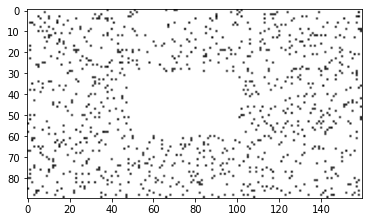

In [55]:
white_image = grey_image.copy()
white_indexes = grey_image>0.25
white_image[white_indexes] = 1. # could be done in one step: white_image[grey_image>0.25] = 1.
plt.imshow(white_image, cmap='gray')

We can trivially count the fraction of black pixels in this last image:

In [56]:
flip = np.round(1-white_image) # reverts black and white, now black pixels are 1
flip.sum()/flip.size # in other words, flip.mean()

0.06430555555555556

Surprise maths question: why isn't this close to 25%?

## 2. OpenAI gym

### Overview

[OpenAI gym](https://gym.openai.com/) is a library that provides formalism for Reinforcement Learning environments.

As you might remember from the intro course, from a high-level, Reinforcement Learning consists of the interactions between an **Agent** and an **Environment**:

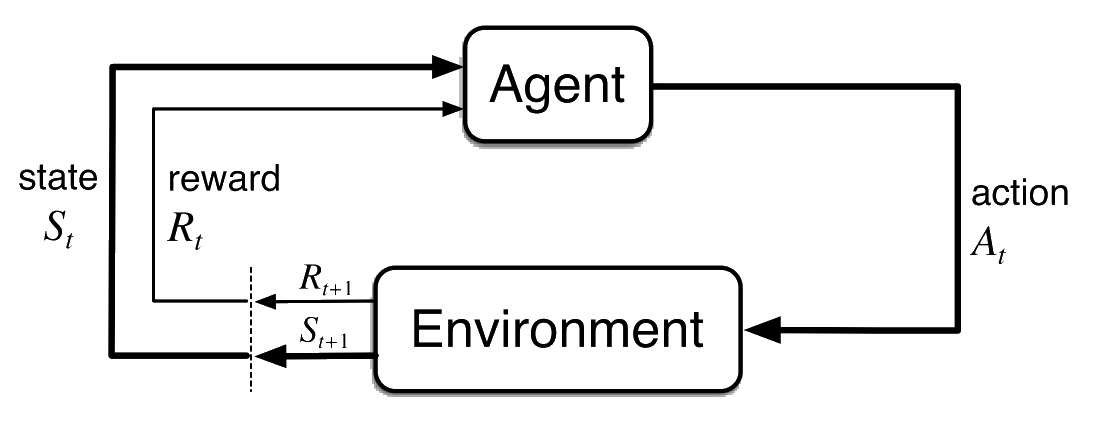

gym instantiates these interactions by providing methods for the Environment side:

- `reset` restarts an episode. It sets the Environment in a starting state S_0 that is returned.
- `step` is the core method encapsulating the Environment response - given an action, this method returns a new state and a reward. Since the RL algorithm needs to know about terminal states, it also returns the `done` signal, indciating whether the episode is done. It also returns an `info` dictionary for our plotting convenience, that the agent is not allowed to observe.

This abstraction of an Environment is very generic, and that is the whole purpose - an RL Agent should be able to learn from scratch, regardless of the Environment it has to solve. There are obviously more elements to the gym Environments, but we'll see them as we move forward.

From a game developer's perspective, a gym Environment can be seen as encapsulating the Game and Visuals dynamics, and assuming the Controls are handled somewhere else.

### The gym interface
Here is an example of a simple game already implemented in gym: [Frozen Lake](https://gym.openai.com/envs/FrozenLake8x8-v0/)

In [106]:
import gym

env = gym.make("FrozenLake8x8-v0") # This instantiates the environment
# agent_act = lambda s: int(input('Provide an integer action in [LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3]: ')) # human agent
agent_act = lambda s: env.action_space.sample() # random agent

# --- Unrolling an episode ---:
state = env.reset() # Restart the episode
while True: # Game loop
    env.render() # visualize the environment
    print(f"State observed by the Agent: {state}") # comparing to the render
    action = agent_act(state)
    next_state, reward, done, info = env.step(action) # make the string action into an int
    state = next_state
    
    if done:
        env.render() # rendering the final state
        break


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
State observed by the Agent: 0
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
State observed by the Agent: 0
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
State observed by the Agent: 0
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
State observed by the Agent: 0
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
State observed by the Agent: 0
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
State observed by the Agent: 0
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
State observed by the Agent: 8
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
State observed by the Agent: 8
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
State observed by the Agent: 8


Although it is abstracted out by the Reinforcement Learning framework, one part that is crucial for our implementations is the State and Action **spaces**. Basically, we need to know what kind of data the agent will get as input (state), and what kind of outputs we're expected to provide (actions). 

Gym provides objects to manipulate and explain these states to the Agent. For example, for FrozenLake:

In [99]:
env.observation_space

Discrete(64)

So the FrozenLake observation space is a `Discrete` space with 64 elements in. In other words, what the Agent can be passed is a number from 0 to 63. While you probably used your vision of the entire lake to move around, the game is vastly different from this, and the agent rather has to remember the consequences of each action in each individual state.

If you wanted to pass to the agent a list of scalars, indicating, for example, the position of its robot arm and the position of the element it has to grab, you would use the `Box` object. In order to instantiate one, you need to pass in the minimum and maximum values that the input could take, since some models require this to get initialized properly. These can be infinite, though, if need be.

In [110]:
high = np.array([1,1,1, 1,1,1]) # maximum imaginary position of your robot arm (1,1,1) and object to grab (1,1,1)
low = -high
gym.spaces.Box(low, high)

Box(4,)

The Agent will now take continuous 4 dimensional values!

In this FrozenLake environment, if, instead of relying on memory, you wanted the Agent to be able to see the whole lake and be able to generalize over random hole and goal positions, you would need to pass in a `Box` of dimensions (8,8). However, you would still need to encode whether a cell of the `Box` is the agent, a frozen cell, the player, or a hole. To achieve this, you could say `-1=hole, 0=frozen, player=1, goal=2`, however, this doesn't make mathematical sense: the player is not "half the goal", and not "negative a hole". This will make it much harder for the Agent to understand its input. More logical would be to input several (8,8) specialized maps: one with the holes, one with the player, one with the goal. Since the frozen cells are the default, you don't really need to include it. Therefore this would lead to the following state space:

In [112]:
shape = (8,8,3)
low = np.zeros(shape)
high = np.ones(shape)
gym.spaces.Box(low, high)

Box(8, 8, 3)

Let's now turn to the Action space. In Reinforcement, there are two main types of action spaces *discrete* or *continuous*, which are both respectively covered by the `Discrete` and `Box` objects:

- Discrete action spaces mean that you have a finite amount of possible actions - this is the case for a videogame controller, for example, with buttons A,B, and joystick inputs Left, Right..., plus eventual combinations. This is also the case for Chess or Go moves.
- Continuous action spaces mean that the action is a continuous quantity (or vector of). This is the case when you drive a car, for example - you can press the gas pedal at any strength within minimum or maximum; you can turn the wheel at any angle. Robot arms tend to work with continuous action spaces as well, with actions corresponding to joint torques. It is quite frequent to *discretize* a continuous action space, even in robotics, since continuous action spaces can be hard to deal with.

Let's see what FrozenLake does:

In [96]:
env.action_space

Discrete(4)

We can efficiently sample from the action space using the `sample` method:

In [97]:
action = env.action_space.sample()
action

0

This directly implements a Random agent!

### Custom Gym Environment
Let's make an easy game with numpy and gym!

Let's make one to shamelessly remind you about some numpy concepts. We spawn on a 5x5 grid, and our goal is to control the whole grid. From where we stand, we have 4 possible actions: North, West, South, or East; this designs the direction in which we will control all cells in the grid, from our position. For example, in this position:
```
 - - - - -
 - - - - -
 - X - - -
 - - - - -
 - - - - -
 ```
`-` is an uncontrolled cell, `X` if the player. If we perform action East:
 ```
 - - - - -
 - - - - -
 - X o o o
 - - - - -
 - - - - -
 ```
 We end up controlling (`o`) the states on our right. Let's say that the agent `X` is teleported to a random controlled spot after this action:
 ```
 - - - - -
 - - - - -
 - o o X o
 - - - - -
 - - - - -
 ```
 And the spot left behind is considered controlled. 
 
 Our goal is to control the entire grid as soon as possible -- if there is one or zero spots left, the episode terminates and we finish the game. Our goal is to finish as soon as possible; therefore, the reward function can be `-1` per step, to motivate us to go faster.
 
`-`, `o` and `X` are only for visualization purposes; from the perspective of an RL Agent, it would be better if these were one-hot encoded vectors (see the state space part on FrozenLake). For now, since we're not going to have an Agent learn this environment in a while, let's make them respectively 0, 1 and 2. The state is therefore a matrix of these values.

In [85]:
import gym
from gym import core, spaces

class GridGameEnv(core.Env):
    def __init__(self):
        self.shape = (5,5)
        high = np.full(shape, 2.) # maximum value attainable by the state
        low  = np.full(shape, 0.) # minimum value attainable by the state
        self.observation_space = spaces.Box(low=low, high=high, dtype=np.float32)
        self.action_space = spaces.Discrete(4) # 4 'Discrete' actions, i.e. no "0.5 North and 1.3 East" stuff
        self.act_to_dir = {
            0: 'North',
            1: 'East',
            2: 'South',
            3: 'West',
        }

    def _get_obs(self):
        out = self.controlled.copy()
        out[tuple(self.agent_pos)] = 2
        return out
        
    def reset(self):
        # When an episode restarts. Reset the grid, replace the agent somewhere
        self.agent_pos = np.random.randint(0,5, 2) # simple x,y coordinates
        print(f"Agent pos: {self.agent_pos}")
        self.controlled = np.zeros(self.shape, dtype=np.int)
        self.controlled[tuple(self.agent_pos)] = 1
        
        return self._get_obs()
    
    def step(self, a):
        a = self.act_to_dir[a]
        if a=='North':
            self.controlled[:self.agent_pos[0]+1, self.agent_pos[1]]   = 1
        if a=='East':
            self.controlled[self.agent_pos[0],    self.agent_pos[1]:]  = 1
        if a=='South':
            self.controlled[self.agent_pos[0]:,   self.agent_pos[1]]   = 1
        if a=='West':
            self.controlled[self.agent_pos[0],   :self.agent_pos[1]+1] = 1
                    
        reward = -1
        done = (1-self.controlled).sum() == 0
        
        if not done:
            free = np.array(np.where(self.controlled == 1)).T
            random_row = np.random.randint(free.shape[0])
            self.agent_pos = free[random_row]
            next_obs = self._get_obs()
        else:
            next_obs = np.ones_like(self.controlled)
        
        return next_obs, reward, done, info

    def render(self):
        obs = self._get_obs().astype(np.str) # 0 1 2 in raw text
        obs[obs=='0'] = '-'
        obs[obs=='1'] = 'o'
        obs[obs=='2'] = 'X'
        print(obs) # could make something more fancy here

    def close(self):
        pass



Sadly, it is not possible to add and `gym.make` a gym environment through a jupyter notebook, because it expects environments to be written in a module. So instead of being fancy, we can just instantiate our Environment like any conventional python object for now; do keep this in mind and store your Env in a module if you ever need to create your own gym Env.

In [94]:
env = GridGameEnv() # This instantiates the environment
agent_act = lambda s: int(input('Provide an integer action in [0: North, 1: East, 2: South, 3: West]: ')) # human agent
#agent_act = lambda s: env.action_space.sample() # random agent

# --- Unrolling an episode ---:
state = env.reset() # Restart the episode

t = 0 # timestep, for our understanding
G = 0 # sum of rewards
while True: # Game loop
    print(f"\n-- Step t={t}:")
    env.render() # visualize the environment
    action = agent_act(state)
    print(f"Performing action {env.act_to_dir[action]}")
    next_state, reward, done, info = env.step(int(action)) # make the string action into an int
    t += 1
    G += reward
    
    if done:
        env.render() # rendering the final state
        break
print(f"Done at step {t} with total reward {G}.")

Agent pos: [2 4]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 2]
 [0 0 0 0 0]
 [0 0 0 0 0]]

-- Step t=0:
[['-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-']
 ['-' '-' '-' '-' 'X']
 ['-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-']]
Provide an integer action in [0: North, 1: East, 2: South, 3: West]: 3
Performing action West

-- Step t=1:
[['-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-']
 ['o' 'X' 'o' 'o' 'o']
 ['-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-']]
Provide an integer action in [0: North, 1: East, 2: South, 3: West]: 0
Performing action North

-- Step t=2:
[['-' 'o' '-' '-' '-']
 ['-' 'o' '-' '-' '-']
 ['o' 'o' 'o' 'X' 'o']
 ['-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-']]
Provide an integer action in [0: North, 1: East, 2: South, 3: West]: 1
Performing action East

-- Step t=3:
[['-' 'o' '-' '-' '-']
 ['-' 'o' '-' '-' '-']
 ['o' 'o' 'o' 'X' 'o']
 ['-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-']]
Provide an integer action in [0: North, 1: East, 2: South, 3: West]: 2
Performing action South

-- Step t=4:
[['-'

That's it for this lab!

Good job and see you next week!